<a href="https://colab.research.google.com/github/armahin/python/blob/main/7.%20OOP%20-%20Inheritance%2C%20Polymorphism%20%26%20Abstraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Class Relationships**


*   Aggreagation
*   Inheritance



## Aggregation (Has-A relationship)

Aggregation means: has a relationship
In simply put,

**ONE CLASS OWNS OTHER CLASS**

means,
One class will be *Owner*

and the other call will be *Property of the Owner Class*

Suppose, We have two classes:

**Customer** and **Address**

What can be the relation in between these two?
*Customer has an Address*

So basically customer class owns the address class.

So whenever we're making an application where one class owns the other class, so the relationship in between these two is called aggregation.  

There can be more examples like:

Restaurant has a Menu class


So let's see now how it works








In [ ]:
#Example
class Customer:

  def __init__(self,name,gender,address):
    self.name = name
    self.gender = gender
    self.address = address


  def print_address(self):
    print(self.address.city,self.address.pin,self.address.state)
# In name we have only one thing that is the name
# In gender we have only male or female
# But in address we know it has many things so it is a complex thing and should be on a seperated class

class Address():

  def __init__(self,city,pin,state):
    self.city = city
    self.pin = pin
    self.state = state

# Now we will make an object of the customer class
# To make the customer class we need to provide 3 things as the input name,gender,address
# Name or gender is very simple
# We can pass it like this cust = Customer('mahin','male', but what about address???)
# Address is not a text, address should be an object.Of which class? Address class
# So before making customer object we need to make an address object

add1 = Address('Bhola',9203,'Barisal')
cust = Customer('mahin','male',add1)
# so this add1 will go to the self.address
# so what actually is we are doing here?
# We are passing an object to the constractor of a class so that the class can use it
# Now let's make a method called print_address where we will print the address
# Let's call that method using the object

cust.print_address()

Bhola 9203 Barisal


This is the flow:


**Now if we make the city attribute private from the Address class, and now if we do aggregation can the customer class print city now?**

Lets see

In [ ]:

class Customer:

  def __init__(self,name,gender,address):
    self.name = name
    self.gender = gender
    self.address = address

  def print_address(self):
    print(self.address.__city,self.address.pin,self.address.state)

class Address():

  def __init__(self,city,pin,state):
    self.__city = city
    self.pin = pin
    self.state = state
add1 = Address('Bhola',9203,'Barisal')
cust = Customer('mahin','male',add1)

cust.print_address()


AttributeError: 'Address' object has no attribute '_Customer__city'

*it's saying the 'Address' object has no attribute '_Customer__city'*

So the ans is **NO**

**You cannot access private attribute whenever you're performing Aggregation**

In [ ]:
# So what can we do
# We can use getter method

class Customer:

  def __init__(self,name,gender,address):
    self.name = name
    self.gender = gender
    self.address = address

  def print_address(self):
    print(self.address.get_city(),self.address.pin,self.address.state)

class Address():

  def __init__(self,city,pin,state):
    self.__city = city
    self.pin = pin
    self.state = state
  def get_city(self):
    return self.__city
add1 = Address('Bhola',9203,'Barisal')
cust = Customer('mahin','male',add1)

cust.print_address()

Bhola 9203 Barisal


**Class Diagram of Aggregation**


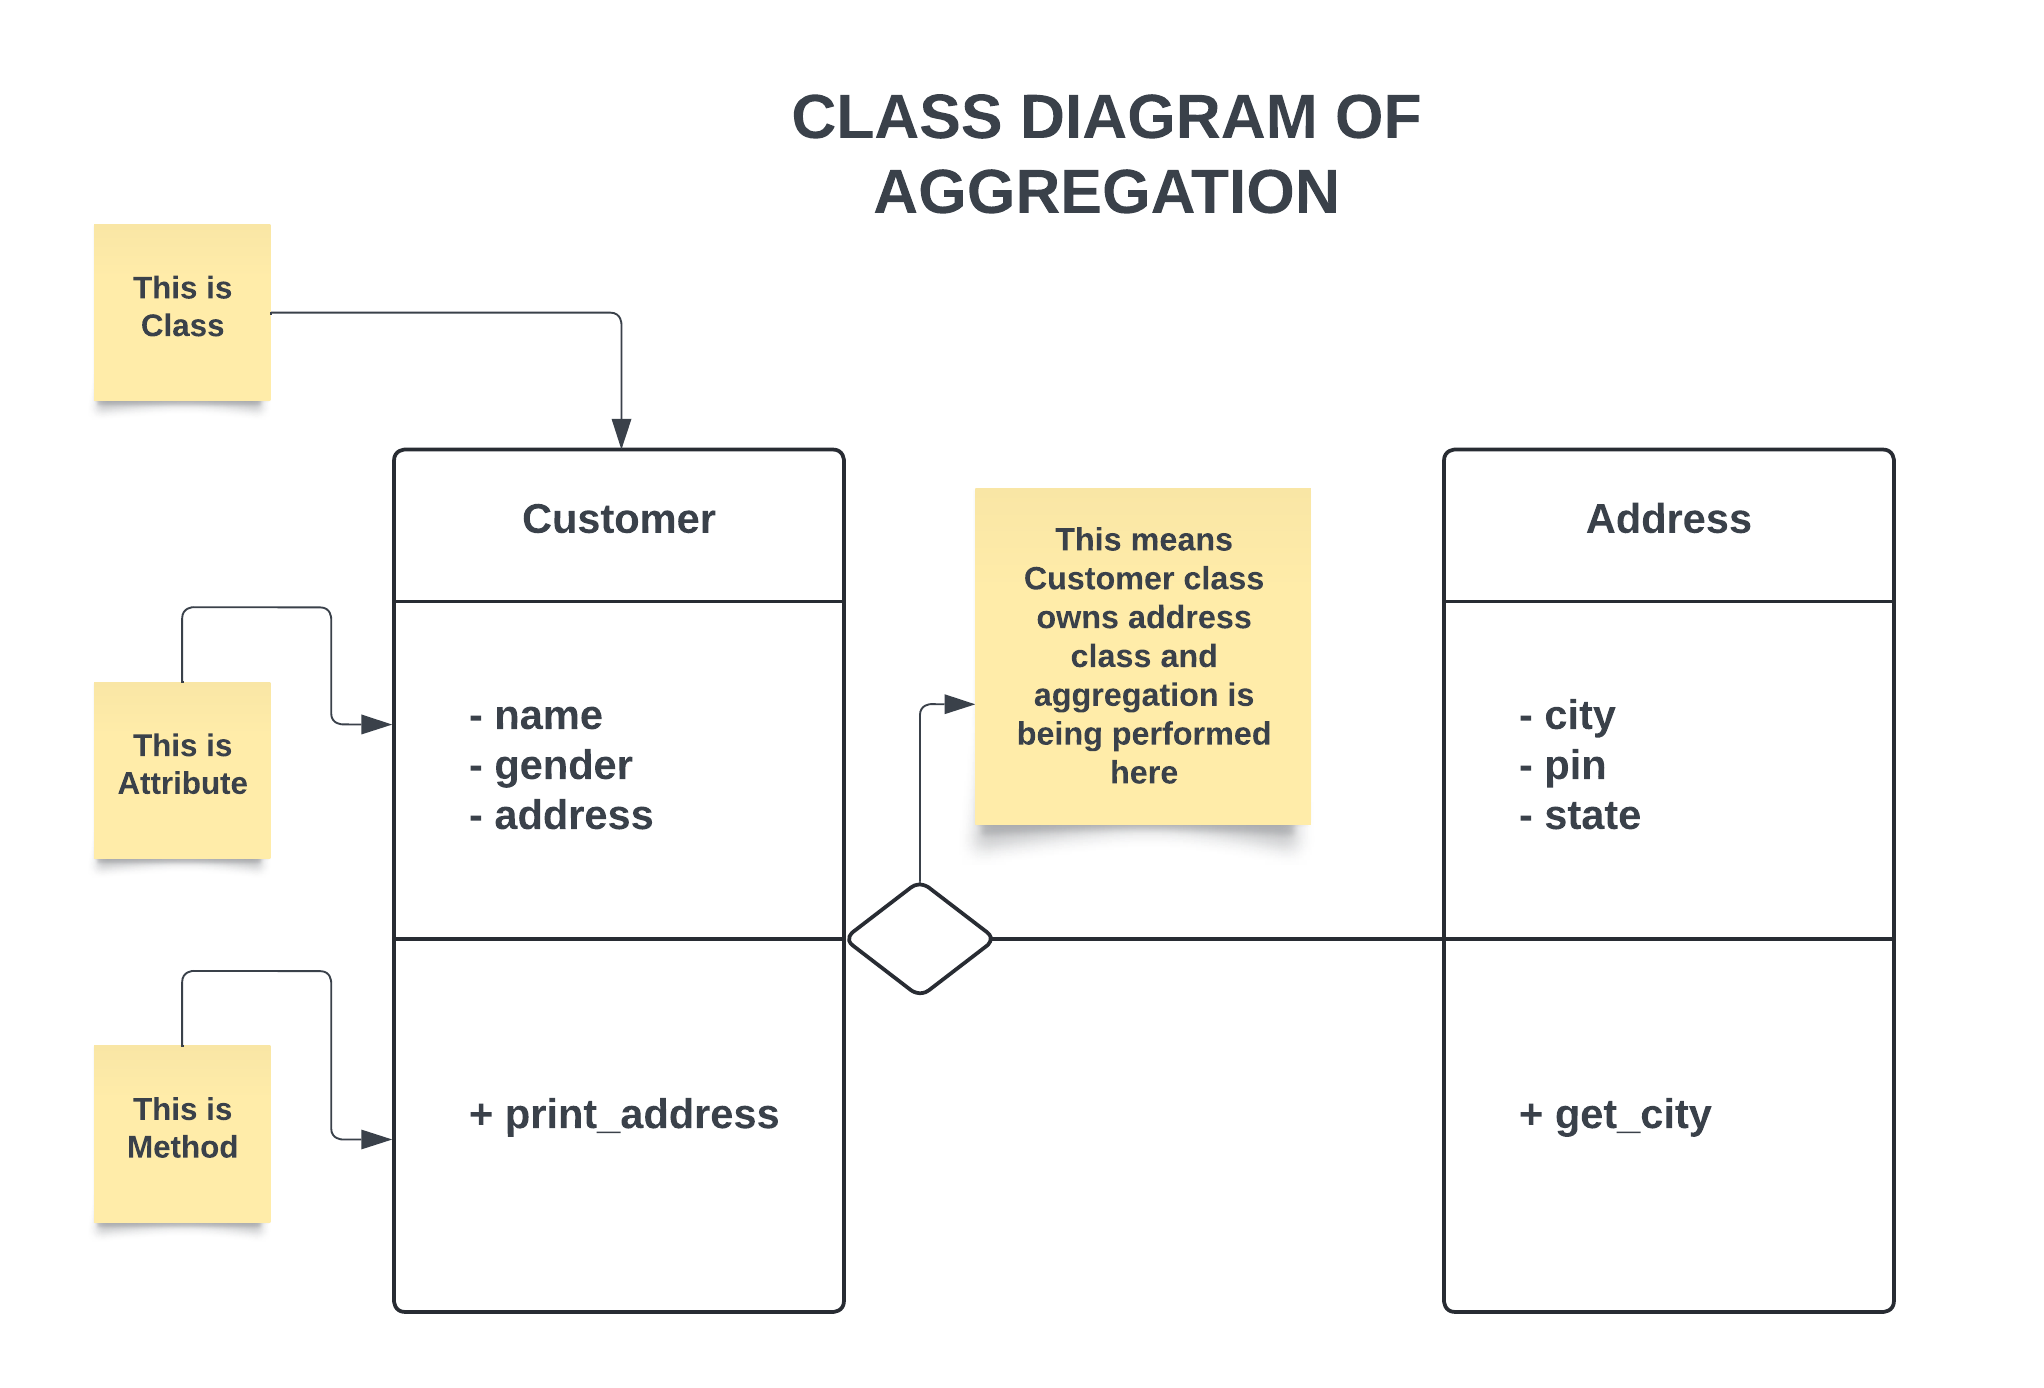







## Inheritance


*   What is inheritance
*   Example
*   What gets inherited?



Inheritance is super simple

Simply means **Whatever is father's, is son's too**

What is the biggest benefit of using inheritance in your code?

You don't violet the DRY
You don't have to repeat yourself
You will make a parent class and there will be child class of that.

In [1]:
# Example

class User:

  def __init__(self):
    self.name = 'arian'

  def login(self):
    print('Login')

class Student(User):
  def __init__(self):
    self.rollno = 100


  def enroll(self):
    print('enroll into the course')

u = User()
s = Student()


In [4]:
s.login()
s.enroll()

Login
enroll into the course


In [5]:
# but if i write
print(s.name)

AttributeError: 'Student' object has no attribute 'name'

Why is this throwing an error?

Cause whenever we are making an object of student class then we're searching for the constructor and if we get the constructor then execute the code under it.
But **if there's no constructor inside the child class, then it will go to the parent class for Constructor**.
**If there is a constructor inside the child class then the constructor of the parent class will not be called anyway and the attributes inside that will also not be created** that's why it is throwing error as there is a constructor in the child class and becase of that the parent class's constructor was not called.So the attributes was to made and threw and error saying " *Student object has no attribute 'name' "

So we can use the parent class's variables inside the constructor whenever we don't have the constructor.

Or there is an alternative way which is called **Super Keyword**

**Inheritance Class Diagram**

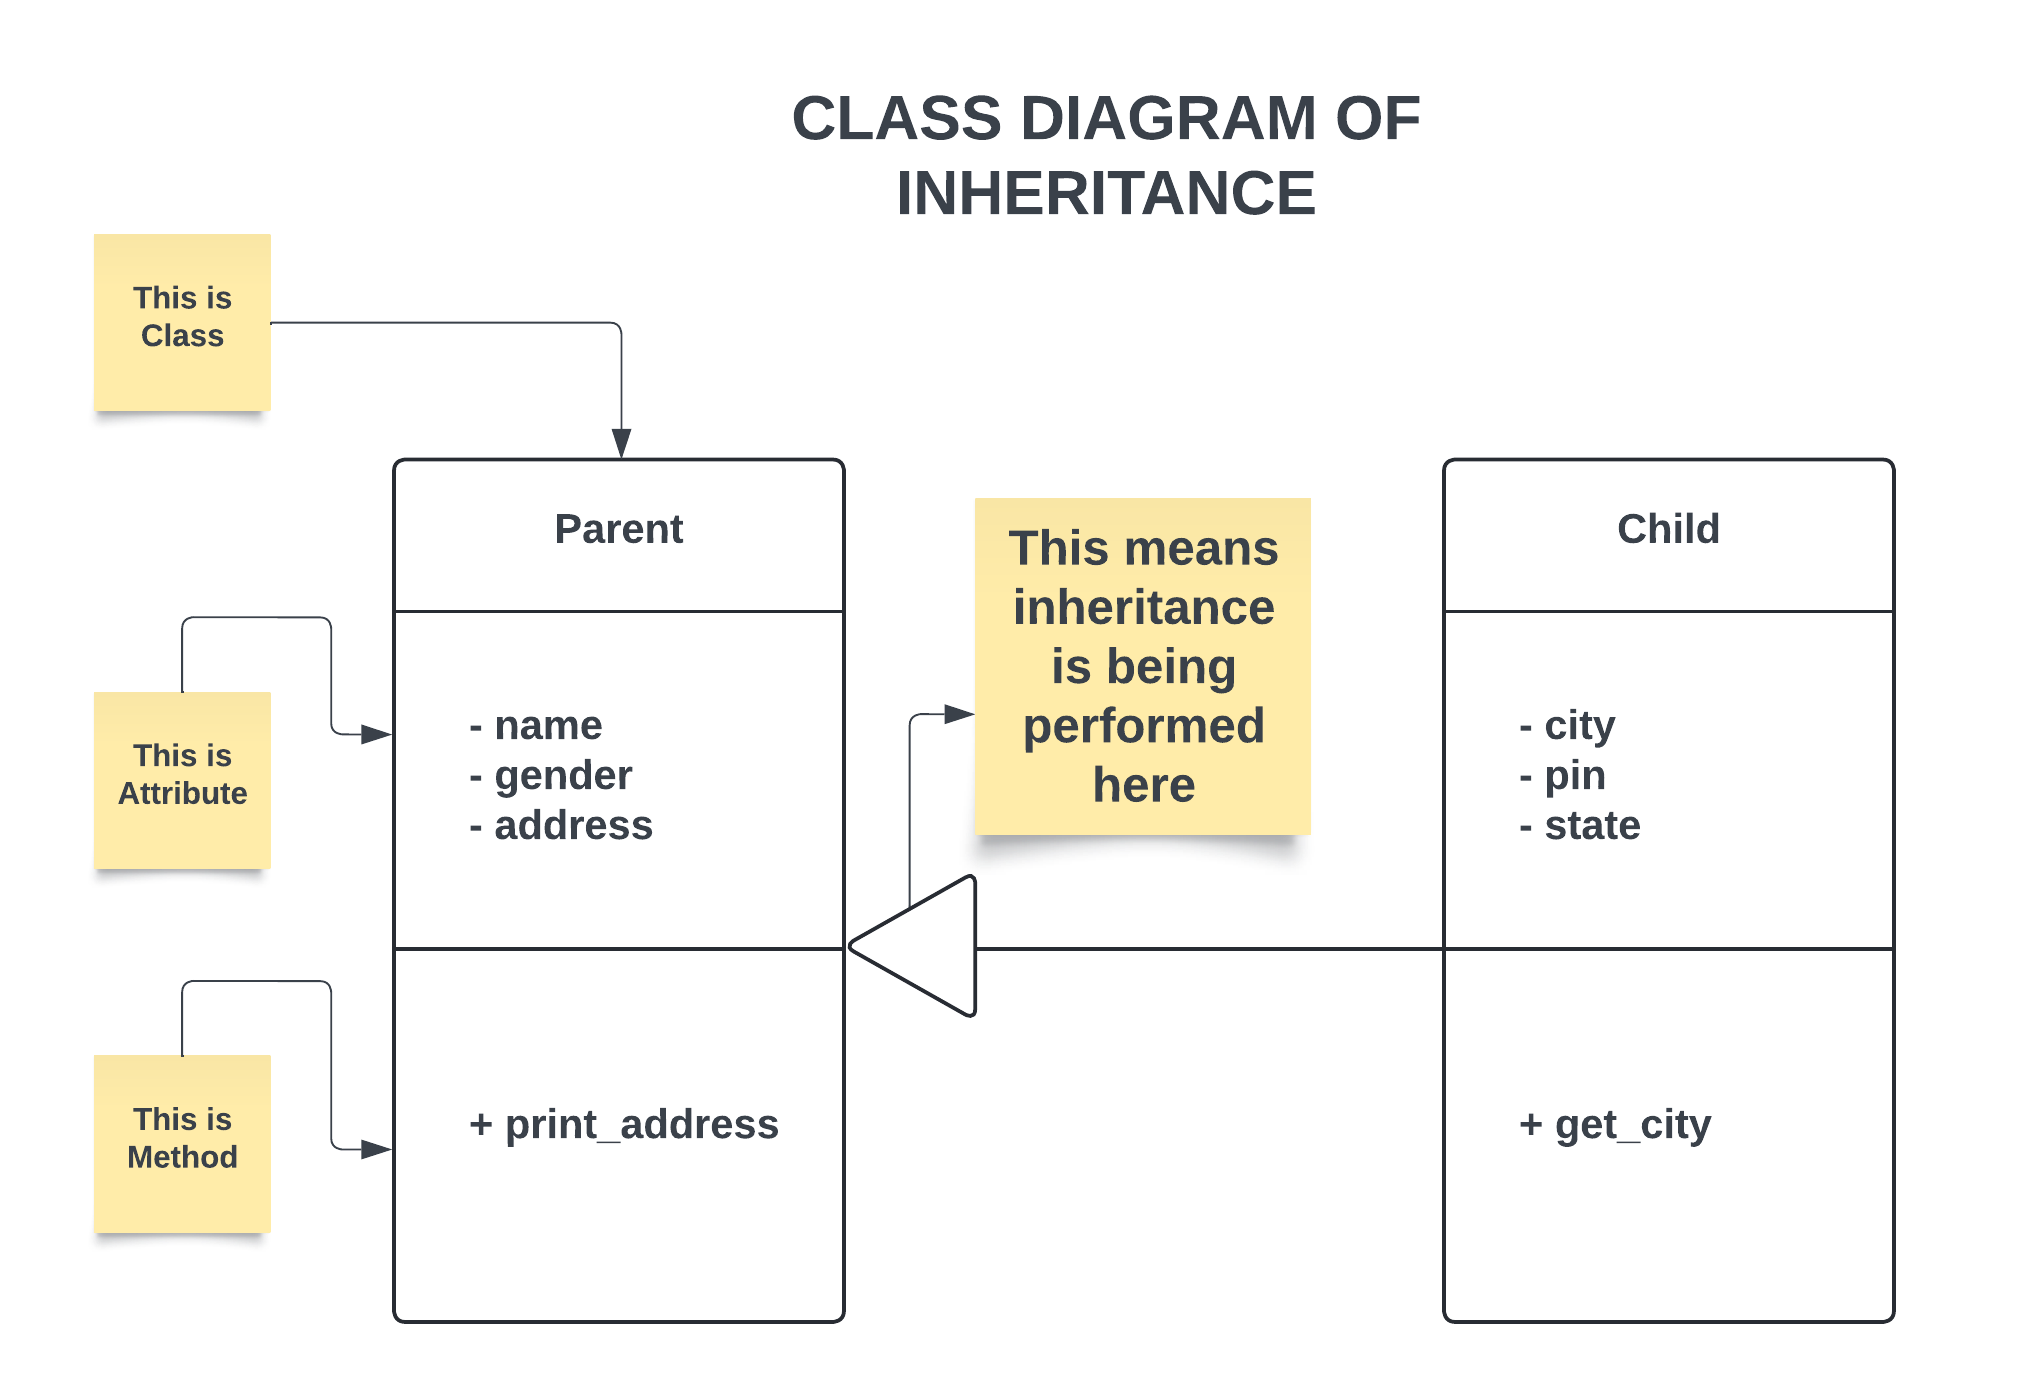

**What gets inheritance?**


*   Constructor
*   Non Private Attributes
*   Non Private Methods



In [6]:
# Constructor Example 1

class Phone:
  def __init__(self,price,brand,camera):
    print("Inside phone constructor")
    self.price = price
    self.brand = brand
    self.camera = camera

  def buy(self):
    print("Buying a phone")

class SmartPhone(Phone):
  pass

s = SmartPhone(20000,'Apple',13)

Inside phone constructor


In [7]:
s.buy()

Buying a phone


In [9]:
# Constructor Example 2

class Phone:
  def __init__(self,price,brand,camera):
    print("Inside phone constructor")
    self.price = price
    self.brand = brand
    self.camera = camera

class SmartPhone(Phone):
  def __init__(self,os,ram):
    self.os = os
    self.ram = ram
    print("Inside SmartPhone constructor")


s = SmartPhone('Android',2)

Inside SmartPhone constructor


In [17]:
# Child Can't Access Private Members of the Class

class Phone:
  def __init__(self,price,brand,camera):
    print("Inside phone constructor")
    self.__price = price
    self.brand = brand
    self.camera = camera

  def getter(self):
    print(self.__price)


class SmartPhone(Phone):
  def check(self):
    print(self.__price)


s = SmartPhone(20000,'Apple',13)
s.getter()
# s.check() will throw an error

Inside phone constructor
20000


In [20]:
# Ex - 1  Accessing Parent Private attribute with getter method

class Parent:

  def __init__(self,num):
    self.__num = num

  def get_num(self):
    return self.__num

class Child(Parent):

  def show(self):

    print('This is in child class')

son = Child(100)
print(son.get_num())
son.show()

100
This is in child class


In [22]:
# Ex - 2 If child has constructor, Parent constructor is not called

class Parent:

  def __init__(self,num):
    self.__num = num

  def get_num(self):
    return self.__num

class Child(Parent):

  def __init__(self,val,num):
    self.__val = val

  def get_val(self):
    return self.__val

son = Child(100,10)
# print("Parent : Num : ",son.get_num()) this will throw an error
print("Child : Val : ",son.get_val())

Child : Val :  100


In [23]:
class A:
    def __init__(self):
        self.var1=100

    def display1(self,var1):
        print("class A :", self.var1)
class B(A):

    def display2(self,var1):
        print("class B :", self.var1)

obj=B()
obj.display1(200)

class A : 100


**Method Ovverriding: If parent and child both has same methods then the child class's method will be executed**

In [26]:
# Method Overriding Example
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):            # Here
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):            # Here
        print ("Buying a smartphone")

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor
Buying a smartphone


**Super Keyword**

Using super keywords we can call parent class's stuffs

In [27]:
# super -> method
class Phone:
  def __init__(self,price,brand,camera):
    print("Inside Phone Constructor")
    self.__price = price
    self.brand = brand
    self.camera = camera

  def buy(self):
    print("Buying a phone")

class SmartPhone(Phone):
  def buy(self):
    print("Buying a smartphone")
    #syntax to call buy method of the parent class
    super().buy()

s=SmartPhone(20000,"Apple",13)
s.buy()

Inside Phone Constructor
Buying a smartphone
Buying a phone


In [28]:
# super -> constuctor
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

class SmartPhone(Phone):
    def __init__(self, price, brand, camera, os, ram):
        print('Inside smartphone constructor')
        super().__init__(price, brand, camera)
        self.os = os
        self.ram = ram
        print ("Inside smartphone constructor")

s=SmartPhone(20000, "Samsung", 12, "Android", 2)

print(s.os)
print(s.brand)

Inside smartphone constructor
Inside phone constructor
Inside smartphone constructor
Android
Samsung


In [29]:
# using super outside the class
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")


s=SmartPhone(20000, "Apple", 13)

s.super().buy()

Inside phone constructor


AttributeError: 'SmartPhone' object has no attribute 'super'

In [30]:
# can super access data of the parent class?
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")
        print(super().brand)



s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor
Buying a smartphone


AttributeError: 'super' object has no attribute 'brand'



*   **Super cannot access variables**
*   **Super cannot be used outside the class**
*   **Super is used inside the child class**








### Inheritance in summary

- A class can inherit from another class.

- Inheritance improves code reuse

- Constructor, attributes, methods get inherited to the child class

- The parent has no access to the child class

- Private properties of parent are not accessible directly in child class

- Child class can override the attributes or methods. This is called method overriding

- super() is an inbuilt function which is used to invoke the parent class methods and constructor

In [31]:
# Ques 1:
class Parent:

    def __init__(self,num):
      self.__num=num

    def get_num(self):
      return self.__num

class Child(Parent):

    def __init__(self,num,val):
      super().__init__(num)
      self.__val=val

    def get_val(self):
      return self.__val

son=Child(100,200)
print(son.get_num())
print(son.get_val())

100
200


In [32]:
# Ques 2:
class Parent:
    def __init__(self):
        self.num=100

class Child(Parent):

    def __init__(self):
        super().__init__()
        self.var=200

    def show(self):
        print(self.num)
        print(self.var)

son=Child()
son.show()

100
200


In [33]:
# Ques 3:
class Parent:
    def __init__(self):
        self.__num=100

    def show(self):
        print("Parent:",self.__num)

class Child(Parent):
    def __init__(self):
        super().__init__()
        self.__var=10

    def show(self):
        print("Child:",self.__var)

obj=Child()
obj.show()

Child: 10


### Types of Inheritance

- Single Inheritance
- Multilevel Inheritance
- Hierarchical Inheritance
- Multiple Inheritance(Diamond Problem)
- Hybrid Inheritance

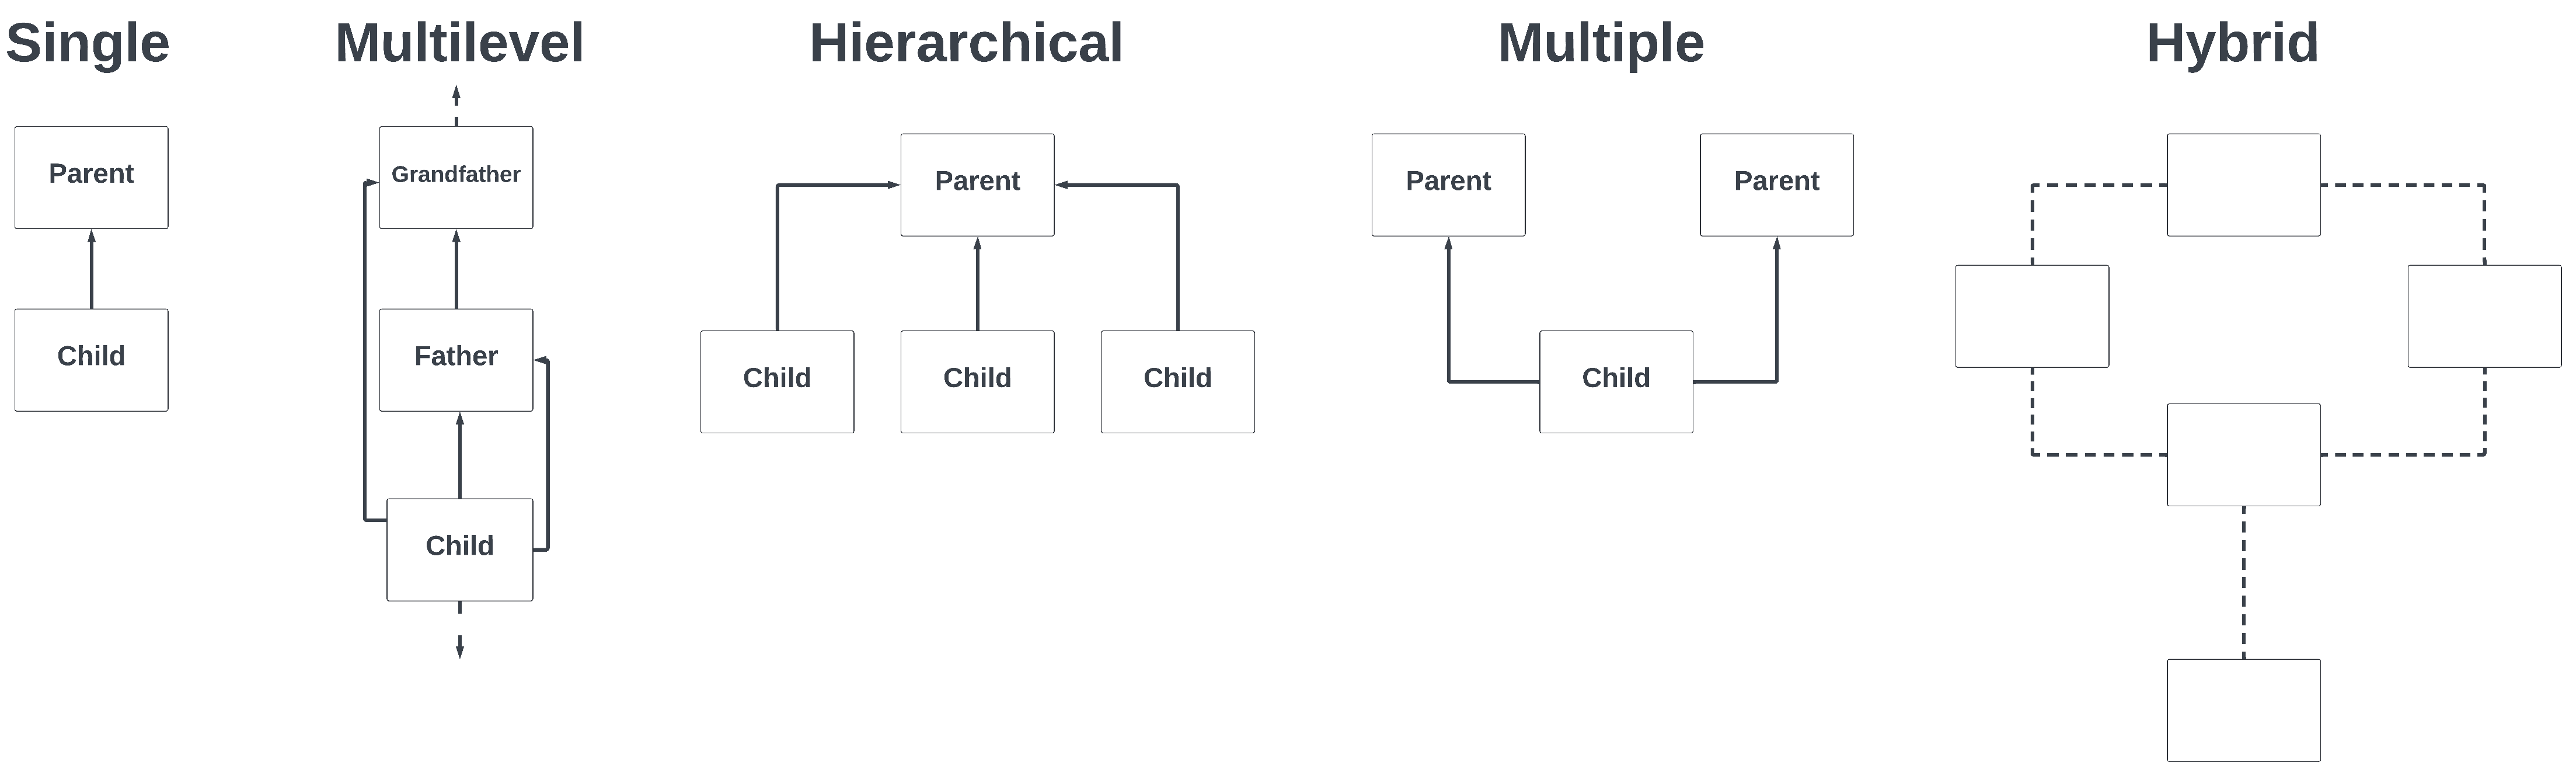

In [37]:
# single inheritance
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

SmartPhone(1000,"Apple","13px").buy()

Inside phone constructor
Buying a phone


In [38]:
# multilevel
class Product:
    def review(self):
        print ("Product customer review")

class Phone(Product):
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()
s.review()

Inside phone constructor
Buying a phone
Product customer review


In [39]:
# Hierarchical
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

class FeaturePhone(Phone):
    pass

SmartPhone(1000,"Apple","13px").buy()
FeaturePhone(10,"Lava","1px").buy()

Inside phone constructor
Buying a phone
Inside phone constructor
Buying a phone


In [40]:
# Multiple
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class Product:
    def review(self):
        print ("Customer review")

class SmartPhone(Phone, Product):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()
s.review()


Inside phone constructor
Buying a phone
Customer review


In [ ]:
# the diamond problem
# https://stackoverflow.com/questions/56361048/what-is-the-diamond-problem-in-python-and-why-its-not-appear-in-python2
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class Product:
    def buy(self):
        print ("Product buy method")

# Method resolution order
class SmartPhone(Phone,Product):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()

In [41]:
class A:

    def m1(self):
        return 20

class B(A):

    def m1(self):
        return 30

    def m2(self):
        return 40

class C(B):

    def m2(self):
        return 20
obj1=A()
obj2=B()
obj3=C()
print(obj1.m1() + obj3.m1()+ obj3.m2())

70


In [42]:
class A:

    def m1(self):
        return 20

class B(A):

    def m1(self):
        val=super().m1()+30
        return val

class C(B):

    def m1(self):
        val=self.m1()+20
        return val
obj=C()
print(obj.m1())

RecursionError: maximum recursion depth exceeded

# **Polymorphism**
**Having multiple faces which means the same thing but behaves differently on diff diff situations**
- Method Overriding
- Method Overloading
- Operator Overloading

In [43]:
#Method overwriting
#If parent and child has same method then the child will be called

In [50]:
#Method Overloading
class Shape:

  def area(self,radius):
      return 3.14*radius*radius

  def area(self,l,b):
    return l*b

d = Shape()
d.area(2)
d.area(3,4)

TypeError: Shape.area() missing 1 required positional argument: 'b'

Why would i use it in my code?


**The code is more clean in reading**

but python doesn't allow this

In [52]:
# Operator Overloading
# Same operator but depending of diff inputs behavior gets changed

In [53]:
'hello' + 'world'

'helloworld'

In [54]:
4 + 5

9

In [55]:
[1,2,3] + [4,5]

[1, 2, 3, 4, 5]

# **Abstraction**
The word abstraction means HIDDEN.
Like electromagnetic wave,it's hidden but we can use it.In microven , printer etc.

Let's see how we use it.

Let's say you are in a bank and you are the senior most developer and you are going to develop this bank application.Now the application is working like, there is a top level application which is the bank app where all the database work is happening and under this level there are 2 apps one is the mobile app and the other is the website app.
So if mobile app is needed something it needs to access the bank app also same goes for the web app so here inheritance is happening. So
**If i am the senior most guy who's making the bank app** , i will tell that, if the web app,mobile app is trying to access my bank app the web app needs to write security code to the application.



In [57]:
#This is an abstract class which means it has atleast one abstract method
#What is abstract method?
#Abstract method is that method in which no code is written so no implementation is gonna happen
# Two types of methods is there 1) Abstract 2) Concrete
#Concrete is what we made before

from abc import ABC,abstractmethod
class BankApp(ABC):

  def database(self):
    print('Connected to database')

  @abstractmethod
  def security(self):
    pass


In [62]:
class MobileApp(BankApp):
  def mobile_login(self):
    print('Login into mobile')


In [63]:
mob = MobileApp()

TypeError: Can't instantiate abstract class MobileApp with abstract method security

In [66]:
class MobileApp(BankApp):
  def mobile_login(self):
    print('Login into mobile')


  def security(self):
    print("Secured")

In [67]:
mob = MobileApp()

**NB: Object of Abstract class making is not possible**